# Heart Disease Prediction

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-dataset/heart.csv


In [21]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Loading the dataset
heart_df = pd.read_csv("/kaggle/input/heart-disease-dataset/heart.csv")
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
# Checking null values
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
# Number of unique values in each feature
heart_df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [14]:
heart_df.shape

(1025, 14)

In [15]:
heart_df["target"].value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [16]:
# Splitting data into features and target
X = heart_df.drop("target",axis = 1)
y = heart_df["target"]

In [18]:
#Splitting into train and test dataset
from sklearn.model_selection import train_test_split
np.random.seed(42)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [19]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((820, 13), (205, 13), (820,), (205,))

### Exploratory Data Analytics

<Axes: >

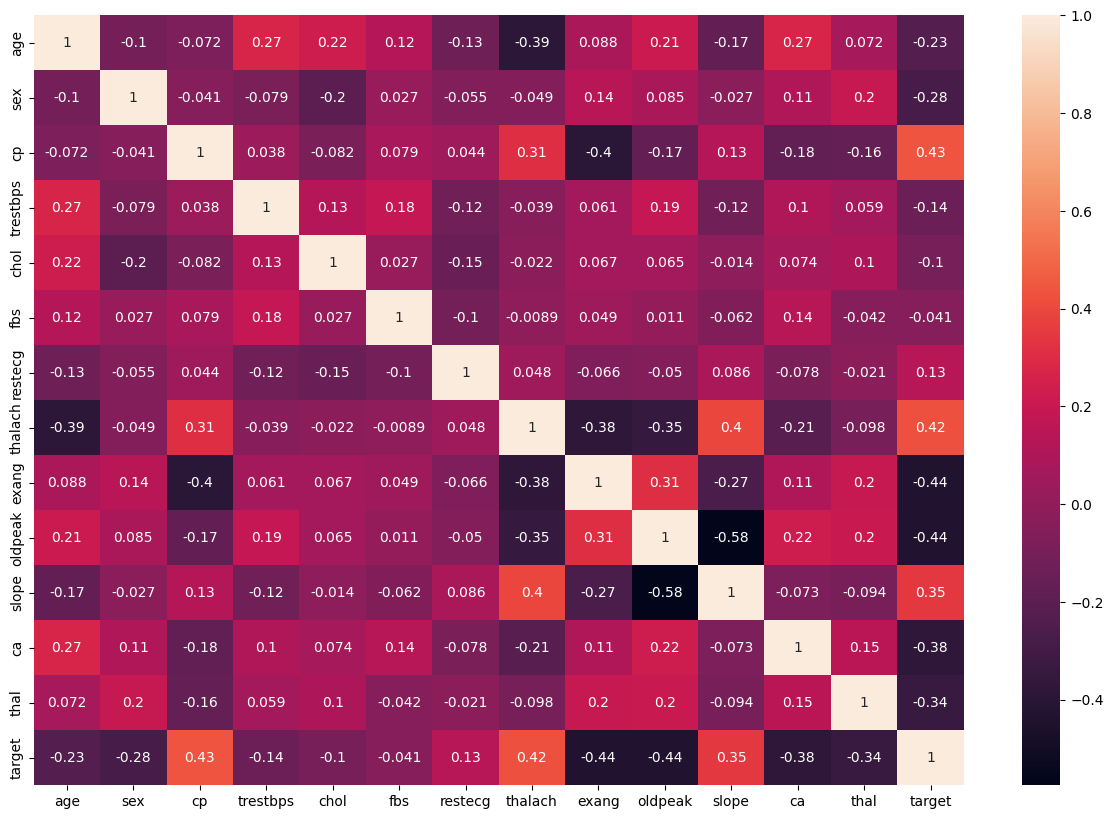

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplots(figsize=(15, 10))
sns.heatmap(heart_df.corr(), annot = True)

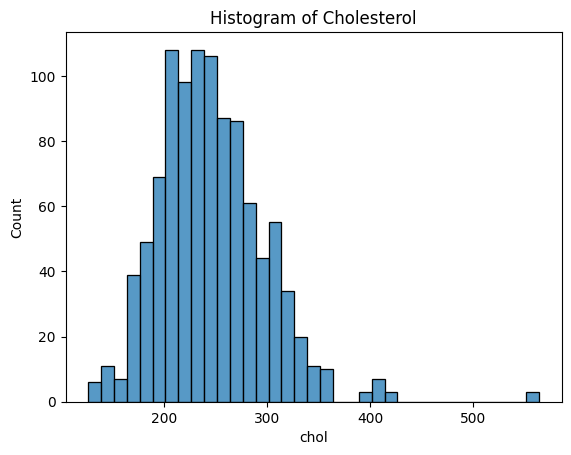

In [72]:
sns.histplot(data=heart_df, x='chol')
plt.title('Histogram of Cholesterol')
plt.show()

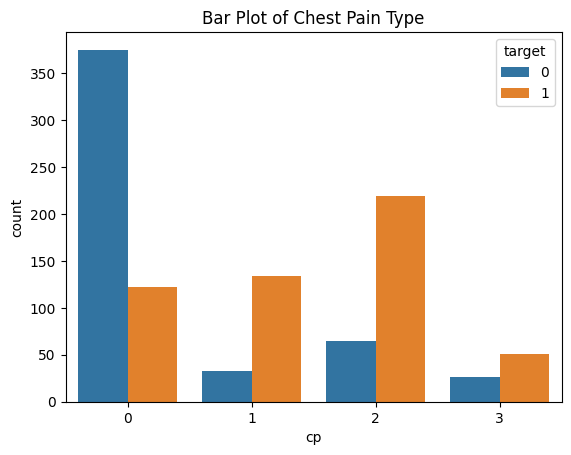

In [73]:
sns.countplot(data=heart_df, x='cp', hue='target')
plt.title('Bar Plot of Chest Pain Type')
plt.show()

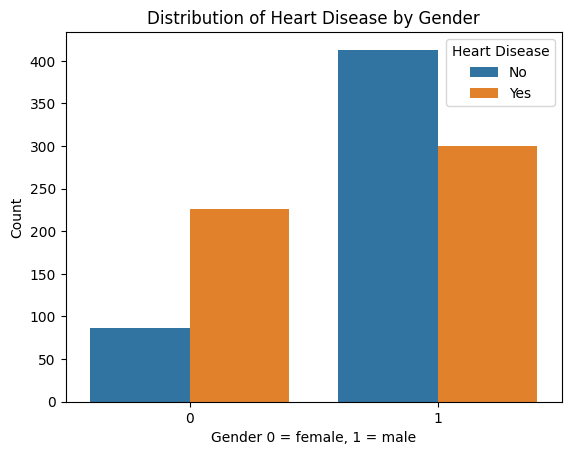

In [74]:
sns.countplot(data=heart_df, x='sex', hue='target')
plt.title('Distribution of Heart Disease by Gender')
plt.xlabel('Gender 0 = female, 1 = male')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

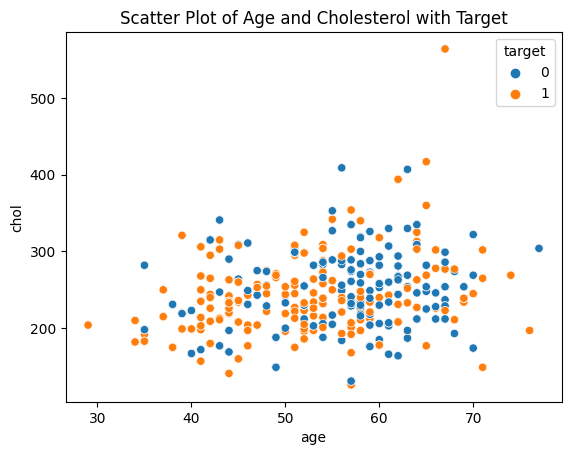

In [75]:
sns.scatterplot(data=heart_df, x='age', y='chol', hue='target')
plt.title('Scatter Plot of Age and Cholesterol with Target')
plt.show()

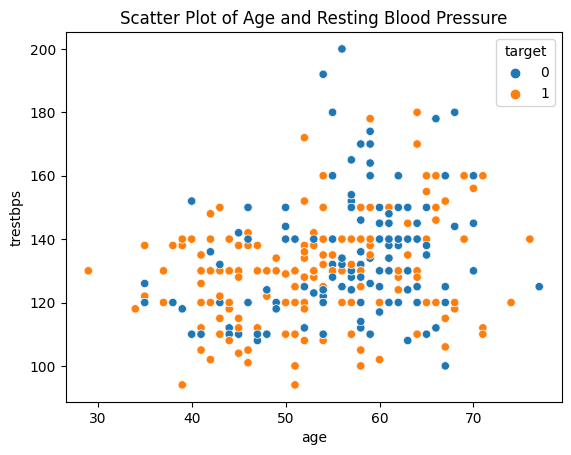

In [76]:
sns.scatterplot(data=heart_df, x='age', y='trestbps', hue='target')
plt.title('Scatter Plot of Age and Resting Blood Pressure')
plt.show()

In [23]:
results = {}

### Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression()
model1.fit(X_train,y_train)

LogisticRegression()

In [30]:
from sklearn.metrics import accuracy_score
train_acc = accuracy_score(y_train,model1.predict(X_train))
train_acc

0.8658536585365854

In [31]:
test_acc = accuracy_score(y_test,model1.predict(X_test))
test_acc

0.7853658536585366

In [32]:
results["Logistic Regression"] = {"Train Accuracy":np.round(train_acc*100,2),"Test Accuracy":np.round(test_acc*100,2)}

### Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier()
model2.fit(X_train,y_train)

RandomForestClassifier()

In [35]:
train_acc = accuracy_score(y_train,model2.predict(X_train))
train_acc

1.0

In [36]:
test_acc = accuracy_score(y_test,model2.predict(X_test))
test_acc

0.9853658536585366

In [37]:
results["Random Forest"] = {"Train Accuracy":np.round(train_acc*100,2),"Test Accuracy":np.round(test_acc*100,2)}

### K Nearest Neighbors

In [43]:
from sklearn.neighbors import KNeighborsClassifier
model3 = KNeighborsClassifier()
model3.fit(X_train,y_train)

KNeighborsClassifier()

In [44]:
train_acc = accuracy_score(y_train,model3.predict(X_train))
train_acc

0.9231707317073171

In [45]:
test_acc = accuracy_score(y_test,model3.predict(X_test))
test_acc

0.7317073170731707

In [46]:
results["KNN"] = {"Train Accuracy":np.round(train_acc*100,2),"Test Accuracy":np.round(test_acc*100,2)}

### Support Vector Machine

In [48]:
from sklearn.svm import SVC
model4 = SVC(kernel='rbf')
model4.fit(X_train,y_train)

SVC()

In [53]:
train_acc = accuracy_score(y_train,model4.predict(X_train))
train_acc

0.723170731707317

In [54]:
test_acc = accuracy_score(y_test,model4.predict(X_test))
test_acc

0.6829268292682927

In [55]:
results["SVC"] = {"Train Accuracy":np.round(train_acc*100,2),"Test Accuracy":np.round(test_acc*100,2)}

In [60]:
results

{'Logistic Regression': {'Train Accuracy': 86.59, 'Test Accuracy': 78.54},
 'Random Forest': {'Train Accuracy': 100.0, 'Test Accuracy': 98.54},
 'KNN': {'Train Accuracy': 92.32, 'Test Accuracy': 73.17},
 'SVC': {'Train Accuracy': 72.32, 'Test Accuracy': 68.29}}

In [66]:
df = pd.DataFrame.from_dict(results, orient='index')

In [67]:
df

,Train Accuracy,Test Accuracy
Logistic Regression,86.59,78.54
Random Forest,100.00,98.54
KNN,92.32,73.17
SVC,72.32,68.29


### The best model is **Random Forest Classifier**

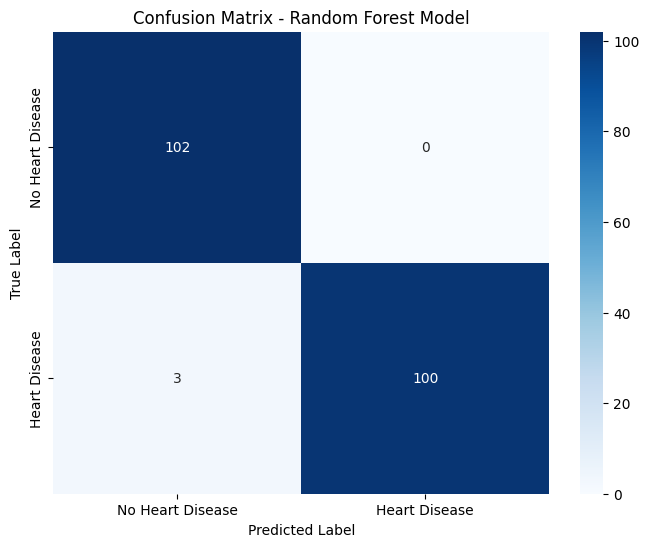

In [81]:
from sklearn.metrics import confusion_matrix
y_pred = model2.predict(X_test)
conf_matrix_rf = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Heart Disease', 'Heart Disease'],
            yticklabels=['No Heart Disease', 'Heart Disease'])
plt.title('Confusion Matrix - Random Forest Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [77]:
import pickle
pickle.dump(model2,open("heart_disease.pkl","wb"))

In [79]:
from IPython.display import FileLink
FileLink('heart_disease.pkl')

/kaggle/working/heart_disease.pkl